In [1]:
import numpy as np
import pandas as pd
import zipfile

In [2]:
zip_file = "Delhi_v2.csv.zip"
extract_file ="delhi_house"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_file)
    print("Extraction completed!")

Extraction completed!


In [3]:
data = pd.read_csv("delhi_house/Delhi_v2.csv")

In [4]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


In [5]:
data.shape

(7738, 18)

In [6]:
data.isnull().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [7]:
data.isna().sum()

Unnamed: 0             0
price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             2572
Status               574
neworold               0
parking             5126
Furnished_status    3614
Lift                6005
Landmarks           4979
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [8]:
data.drop(columns=["Lift"], inplace=True)

In [9]:
data.drop(columns=['parking'], inplace=True)

In [10]:
data.drop(columns=['Landmarks'], inplace=True)

In [11]:
data.drop(columns=['desc'], inplace=True)

In [12]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
data.drop(columns=["Price_sqft"], inplace=True)

In [14]:
data["Balcony_missing"] = data["Balcony"].isnull().astype(int)
data["Balcony"] = data["Balcony"].fillna(data["Balcony"].median())

In [15]:
data["Furnished_status"] = data["Furnished_status"].fillna("Unknown")

In [16]:
data["Status"] = data["Status"].fillna(data["Status"].mode()[0])

In [17]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Balcony_missing
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000
mean,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.284699,0.332386
std,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,0.907924,0.471099
min,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,0.000000
25%,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,0.000000
50%,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,0.000000
75%,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,1.000000
max,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           7738 non-null   float64
 8   Status            7738 non-null   object 
 9   neworold          7738 non-null   object 
 10  Furnished_status  7738 non-null   object 
 11  type_of_building  7738 non-null   object 
 12  Balcony_missing   7738 non-null   int64  
dtypes: float64(7), int64(1), object(5)
memory usage: 786.0+ KB


In [19]:
data["Balcony"].value_counts()

Balcony
2.0     4365
3.0     1516
1.0     1082
4.0      613
5.0      130
6.0       21
7.0        4
10.0       3
8.0        3
9.0        1
Name: count, dtype: int64

In [20]:
data.to_csv("cleaned_delhi.csv", index=False)

In [21]:
numeric_corr = data.select_dtypes(include=['number']).corr()
print(numeric_corr["price"].sort_values(ascending=False))

price              1.000000
area               0.849073
Bathrooms          0.691990
Bedrooms           0.606914
Balcony            0.235497
Balcony_missing   -0.083214
latitude          -0.227517
longitude         -0.331883
Name: price, dtype: float64


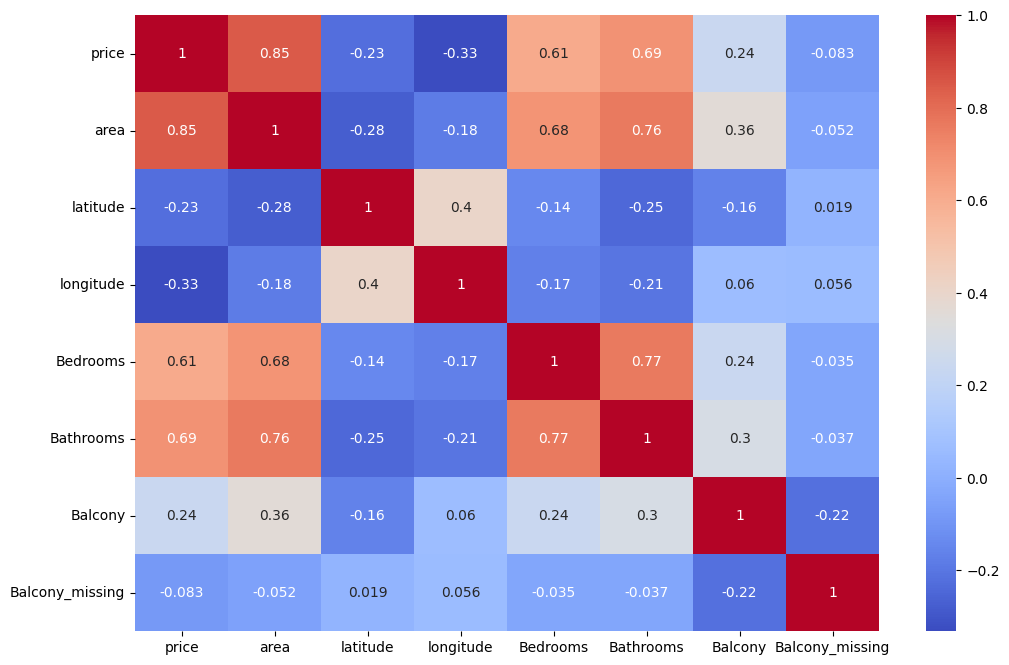

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(numeric_corr, annot=True, cmap="coolwarm")
plt.show()

In [23]:
def extract_location(address):
    try:
        if pd.isna(address):
            return "unknown"

        parts = [p.strip().lower() for p in str(address).split(",")]

        # Usually locality appears second last
        if len(parts) >= 2:
            return parts[-2]

        return parts[0]

    except:
        return "unknown"


# Extract location
data["location"] = data["Address"].apply(extract_location)

# Clean text
data["location"] = (
    data["location"]
    .str.lower()
    .str.strip()
)

# Remove rare locations
location_counts = data["location"].value_counts()
common_locations = location_counts[location_counts >= 20].index

data["location"] = data["location"].apply(
    lambda x: x if x in common_locations else "other"
)
print("Unique Locations:", data["location"].nunique())
print(data["location"].value_counts())

Unique Locations: 12
location
ghaziabad             2096
gurgaon               1815
noida                 1094
greater noida          962
faridabad              472
new delhi - west       440
new delhi - south      330
new delhi - dwarka     188
new delhi - east       182
new delhi - rohini      81
new delhi - north       53
other                   25
Name: count, dtype: int64


In [24]:
if "Address" in data.columns:
    data.drop(columns=["Address"], inplace=True)

In [25]:
data.duplicated().sum()

np.int64(52)

In [26]:
data = data.drop_duplicates().reset_index(drop=True)

In [27]:
data.shape

(7686, 13)

In [28]:
data.isnull().sum().sort_values(ascending=False)

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
Furnished_status    0
type_of_building    0
Balcony_missing     0
location            0
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

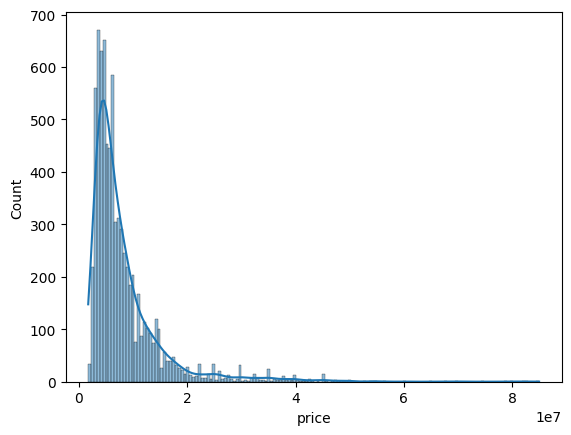

In [29]:
sns.histplot(data['price'], kde=True)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [84]:
y = np.log(data["price"])
X = data.drop("price", axis=1)
data["price"] = np.log(data["price"])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print(X_train.shape)
print(X_test.shape)

(6148, 12)
(1538, 12)


In [87]:
categorical_cols = [
    'location',
    'neworold',
    'type_of_building',
    'Status',
    'Furnished_status'
]

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    remainder="passthrough"
)

In [88]:
models = {

    "Linear": make_pipeline(
        column_trans,
        StandardScaler(),
        LinearRegression()
    ),

    "Ridge": make_pipeline(
        column_trans,
        StandardScaler(),
        Ridge(alpha=1.0)
    ),

    "Lasso": make_pipeline(
        column_trans,
        StandardScaler(),
        LassoCV(cv=5)
    ),

    "ElasticNet": make_pipeline(
        column_trans,
        StandardScaler(),
        ElasticNetCV(cv=5)
    ),

    "Random Forest": make_pipeline(
        column_trans,
        RandomForestRegressor(
            n_estimators=300,
            random_state=42
        )
    ),

    "XGBoost": make_pipeline(
        column_trans,
        XGBRegressor(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        )
    )
}

In [89]:
results = {}

for name, model in models.items():

    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))

    results[name] = {
        "R2": r2,
        "MAE": mae,
        "RMSE": rmse
    }

    print(f"\n{name}")
    print("R2:", r2)
    print("MAE:", mae)
    print("RMSE:", rmse)


Linear
R2: 0.7426343647387204
MAE: 0.005322749613106411
RMSE: 0.007129635675023149

Ridge
R2: 0.7426502131824073
MAE: 0.00532284752631223
RMSE: 0.007129416151991324

Lasso
R2: 0.74246058247406
MAE: 0.005324429425401058
RMSE: 0.007132042358317141

ElasticNet
R2: 0.7424612123616088
MAE: 0.005324435469499076
RMSE: 0.007132033636569865

Random Forest
R2: 0.9338821011431081
MAE: 0.0027578146891638167
RMSE: 0.003613695718663437

XGBoost
R2: 0.9383987998489438
MAE: 0.002738934550450729
RMSE: 0.0034880816784392953


In [90]:
best_model = max(results, key=lambda x: results[x]["R2"])
print("Best Model:", best_model)

Best Model: XGBoost


In [92]:
import joblib
joblib.dump(models["XGBoost"], "house_price_model.pkl")

['house_price_model.pkl']

In [93]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    models["XGBoost"],
    X_train,
    y_train,
    cv=5,
    scoring="r2"
)

print("CV Scores:", cv_scores)
print("CV Mean:", cv_scores.mean())


CV Scores: [0.9347652  0.93390985 0.93392904 0.93246172 0.93419714]
CV Mean: 0.933852588391486


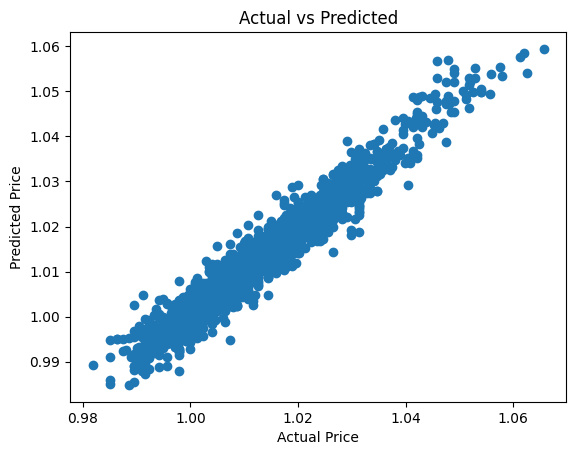

In [94]:
pred = models["XGBoost"].predict(X_test)

plt.scatter(y_test,pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted")
plt.show()

In [100]:
def predict_with_range(model_pipeline, input_df):

    rf_model = model_pipeline.named_steps['randomforestregressor']

    transformed = model_pipeline[:-1].transform(input_df)

    tree_preds = np.array([
        tree.predict(transformed) for tree in rf_model.estimators_
    ])

    mean_pred = tree_preds.mean()
    low_pred = np.percentile(tree_preds, 10)
    high_pred = np.percentile(tree_preds, 90)

    # Convert back to real price
    mean_pred = np.expm1(mean_pred)
    low_pred = np.expm1(low_pred)
    high_pred = np.expm1(high_pred)

    return mean_pred, low_pred, high_pred


In [101]:
 sample_user = {
    "area": 1800,
    "Bedrooms": 3,
    "Bathrooms": 2,
    "Balcony": 1,
     "Balcony_missing":  0,
    "location": "noida",
    "neworold": "Resale",
    "type_of_building": "Apartment",
    "Status": "Ready to Move",
    "Furnished_status": "Semi-Furnished",
    "latitude": 28.6139,
    "longitude": 77.2090
}

sample_df = pd.DataFrame([sample_user])

In [102]:
mean_price, low_price, high_price = predict_with_range(models["Random Forest"], sample_df)

print(f"Predicted Price : ₹{mean_price:,.0f}")
print(f"Expected Range  : ₹{low_price:,.0f}  →  ₹{high_price:,.0f}")

Predicted Price : ₹2
Expected Range  : ₹2  →  ₹2


In [104]:
random_samples = X_test.sample(5, random_state=42)

pred_log = models["XGBoost"].predict(random_samples)
preds = np.expm1(pred_log)

actual_log = y_test.loc[random_samples.index]
actual = np.expm1(actual_log)

comparison = pd.DataFrame({
    "Actual Price": actual,
    "Predicted Price": preds,
    "Difference": np.abs(actual - preds),
    "Error %": np.abs((actual - preds) / actual) * 100
})

print(comparison)


      Actual Price  Predicted Price  Difference   Error %
4328      1.706627         1.711535    0.004908  0.287592
4769      1.730566         1.725676    0.004890  0.282573
4166      1.717160         1.717584    0.000424  0.024719
354       1.702309         1.688257    0.014051  0.825417
6855      1.814073         1.795454    0.018620  1.026399


In [ ]:
compari